In [13]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("NMvW_data/v0.csv.gz", 
                 dtype=dict(Provenance="string", RelatedWorks="string"))

# TODO: save & load DF s.t. these lines are not necessary here                
df["ObjectID"] = df.ObjectID.astype("int")
df = df.set_index("ObjectID")

In [3]:
df2 = df[(df.BeginISODate+df.EndISODate) > 0]

df2.apply(lambda r: len(str(r.Title) + str(r.Description)) > 6, axis="columns").sum()/df2.shape[0]

0.9896853361997735

In [22]:
type(df2.iloc[0].Description)

float

In [28]:
from tqdm import tqdm

import spacy
from nltk import Tree

nlp = spacy.load("nl_core_news_sm")

def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_
    
doc = nlp(df.Description.dropna().iloc[0])
print(doc)
[to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]

De ijzeren punt is op de rieten schacht gestoken en bevestigd door middel van een omwinding van boombastvezel.
                                     gestoken                                               
  ______________________________________|_____________                                       
 |   |       |                  |                 bevestigd                                 
 |   |       |                  |               ______|_________                             
 |   |       |               schacht           |            omwinding                       
 |   |       |                  |              |       _________|____________________        
 |   |      punt              rieten           |      |               door     boombastvezel
 |   |    ___|______       _____|_______       |      |          ______|____         |       
 is  .   De      ijzeren  op            de     en    een      middel       van      van     



[None]

In [29]:
from spacy import displacy
displacy.render(doc, style='dep')

In [8]:
[nlp(t) for t in tqdm(df.Description) if isinstance(t, str)]


  1%|          | 6943/579927 [01:07<5:12:09, 30.59it/s]


  1%|▏         | 8128/579927 [01:52<4:56:59, 32.09it/s]


  2%|▏         | 9354/579927 [02:33<5:30:22, 28.78it/s]


  2%|▏         | 10912/579927 [03:18<5:46:54, 27.34it/s]


  2%|▏         | 12777/579927 [03:49<3:03:14, 51.59it/s]

KeyboardInterrupt: 

---
# Search

In [9]:
kws = "" # "hello, goodbye"
prep_kws = "|".join(kws.lower().replace(", ", ",").split(","))
        
if (not kws.strip()) or (not prep_kws):
    does_contain = [True]*df.shape[0]
else:
    print("what")
    
print(does_contain)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [8]:
from urllib.parse import unquote

unquote('"objectKeywords"%3A""%2C"objectStartDate"%3A""%2C"objectEndDate"')

'"objectKeywords":"","objectStartDate":"","objectEndDate"'

---
# Dates

 1. make all dates at least 1 (because python cannot
 

In [11]:
from datetime import datetime
frmt = "%Y-%m-%d"
start_year, end_year = datetime.strptime("2011-02-01", frmt), datetime.strptime("2013-10-02", frmt)

In [18]:
(start_year.year > df.BeginISODate).sum()

579307

<AxesSubplot:>

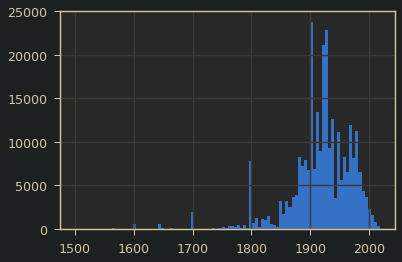

In [26]:
df.BeginISODate[(df.BeginISODate > 1500)].hist(bins=100)

---
# Fixing Strange x-Axis Data Issue 

In [ ]:
https://sabio.diginfra.nl/api/v1/objects/<datasetID>/search/%7B%22objectKeywords%22%3A%22hengelo%22%2C%22objectStartDate%22%3A%22%22%2C%22objectEndDate%22%3A%22%22%2C%22objectParams%22%3A[%7B%22id%22%3A%22Classification%22%2C%22value%22%3A%22%22%7D%2C%7B%22id%22%3A%22Department%22%2C%22value%22%3A%22%22%7D]%2C%22engineId%22%3A%22RandomEnginev0%22%2C%22engineMinScore%22%3A0%2C%22engineMaxScore%22%3A1%2C%22engineParams%22%3A[%7B%22id%22%3A0%2C%22value%22%3A%22useless1%22%7D]%2C%22vocabularyTerms%22%3A%22bewindhebber%2Cbewindvoerder%2Cbomba%2Cbombay%2Ccimarron%2Cderde%20wereld%2Cdwerg%2Cexpeditie%2Cgouverneur%2Chalfbloed%2Chottentot%2Cinboorling%2Cindiaan%2Cindisch%2Cindo%2Cinheems%2Cinlander%2Cjap%2Cjappen%2Cjappenkampen%2Ckaffer%2Ckaffir%2Ckafir%2Ckoelie%2Ckolonie%2Clagelonenland%2Clandhuis%2Cmarron%2Cmarronage%2Cmissie%2Cmissionaris%2Cmoor%2Cmoors%2Cmoren%2Cmulat%2Coctroon%2Contdekken%2Contdekking%2Contdekkingsreis%2Contwikkelingsland%2Coorspronkelijk%2Coosters%2Copperhoofd%2Cori%C3%ABntaals%2Cpinda%2Cpolitionele%20actie%2Cprimitief%2Cprimitieven%2Cpygmee%2Cras%2Crasch%2Cslaaf%2Cstam%2Cstamhoofd%2Ctraditioneel%2Ctropisch%2Cwesters%2Cwilden%2Czendeling%2Czendelingen%2Czending%22%7D/scatterplot/1/405100?api=https%3A%2F%2Fsabio.diginfra.net%2Fapi%2Fv1%2F

In [ ]:
https://sabio.diginfra.nl/api/v1/engines

In [ ]:
https://sabio.diginfra.net/api/v1/objects/NMvW_v0/search?object_keywords=hengelo&object_start_date=&object_end_date=&engine_id=RandomEnginev0&engine_min_score=0&engine_max_score=1&vocabulary_terms=bewindhebber%2Cbewindvoerder%2Cbomba%2Cbombay%2Ccimarron%2Cderde%20wereld%2Cdwerg%2Cexpeditie%2Cgouverneur%2Chalfbloed%2Chottentot%2Cinboorling%2Cindiaan%2Cindisch%2Cindo%2Cinheems%2Cinlander%2Cjap%2Cjappen%2Cjappenkampen%2Ckaffer%2Ckaffir%2Ckafir%2Ckoelie%2Ckolonie%2Clagelonenland%2Clandhuis%2Cmarron%2Cmarronage%2Cmissie%2Cmissionaris%2Cmoor%2Cmoors%2Cmoren%2Cmulat%2Coctroon%2Contdekken%2Contdekking%2Contdekkingsreis%2Contwikkelingsland%2Coorspronkelijk%2Coosters%2Copperhoofd%2Cori%C3%ABntaals%2Cpinda%2Cpolitionele%20actie%2Cprimitief%2Cprimitieven%2Cpygmee%2Cras%2Crasch%2Cslaaf%2Cstam%2Cstamhoofd%2Ctraditioneel%2Ctropisch%2Cwesters%2Cwilden%2Czendeling%2Czendelingen%2Czending&object_param_Classification=&object_param_Department=&engine_param_0=useless1

---

In [4]:
from src.results import Result

In [7]:
param_names = ["Department", "Classification"]

In [8]:
attributes = ["BeginISODate", "EndISODate"] 
attributes = attributes + param_names

In [9]:
df[attributes]

,BeginISODate,EndISODate,Department,Classification
ObjectID,,,,
1,0,2011,Insulair Zuidoost-Azië,Materiële cultuurcollectie
2,1850,1958,Insulair Zuidoost-Azië,Materiële cultuurcollectie
3,0,2009,Insulair Zuidoost-Azië,Materiële cultuurcollectie
4,0,2011,(regio niet-specifiek),Materiële cultuurcollectie
5,1850,1958,(niet toegekend),Materiële cultuurcollectie
...,...,...,...,...
1140716,0,0,Zuidwest- en Centraal-Azië,Audiovisuele collectie
1140717,0,0,Zuidwest- en Centraal-Azië,Audiovisuele collectie
1140718,0,0,Zuidwest- en Centraal-Azië,Audiovisuele collectie


In [10]:
values = df[attributes]

In [14]:
r = Result(param_names=param_names, rows=df, scores=np.zeros(len(df)), 
                 score_details=df, min_score=0., max_score=1.)

In [15]:
r.values

,BeginISODate,EndISODate
ObjectID,,
1,0,2011
2,1850,1958
3,0,2009
4,0,2011
5,1850,1958
...,...,...
1140716,0,0
1140717,0,0
1140718,0,0


---
# Keyword Search Dev

In [17]:
kws = "Maarten Sint"
prep_kws = "|".join(kws.lower().replace(", ", ",").split(","))

In [18]:
prep_kws

'maarten sint'

In [28]:
d = dict(a=)

d.get("a", False)

1

In [30]:
def f(**kwargs):
    print(kwargs)
    
    
d = dict(a=13)
f(a=0, **d)

TypeError: __main__.f() got multiple values for keyword argument 'a'